<a href="https://colab.research.google.com/github/ern85/NeuralNetworks/blob/main/TestesRedesMestradoSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
nltk.download('rslp')
nltk.download('stopwords')
from nltk.stem import RSLPStemmer #Removedor de Sufixos da Língua Portuguesa

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from keras import backend as K
import time

startTotalTime = time.time()

opinion_reviews = pd.read_excel("/content/drive/MyDrive/Mestrado/RedeNeuralMestrado/AvalicoesAmazonFinal.xlsx")



[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
opinion_reviews.isnull().values.any()

False

In [ ]:
opinion_reviews.shape

(2654, 2)

In [ ]:
opinion_reviews.head()

,Opinioes,Sentimento
0,"Vamos lá, direto ao ponto: vale a pena comprar...",n
1,"Falta o suporte de filtro e clipe nasal, tem q...",n
2,"A máscara é de boa qualidade , mas não é tão c...",n
3,"produto feio sem caixa, sem nota, filtro apena...",n
4,"A máscara é de boa qualidade, confortável e nã...",p


In [ ]:
opinion_reviews["Opinioes"][3]

'produto feio sem caixa, sem nota, filtro apenas 1, e sem qualquer segurança, aberto, e apesar de não acreditar estar contaminado, um produto que supostamente feito para segurança venha sem qualquer segurança higiênicaAchei muita falta de compromisso.'

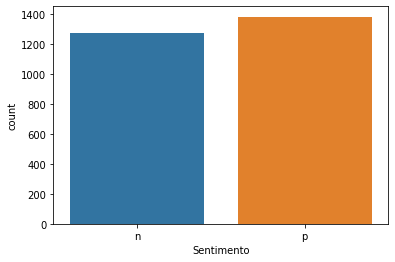

In [ ]:
import seaborn as sns

sns.countplot(x='Sentimento', data=opinion_reviews)

**Iniciando Pré-processamento**

In [ ]:
startPreProcTime = time.time()

In [ ]:
def preprocess_text(sen):
    # Removing html tags
    sentence = remove_tags(sen)

    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [ ]:
#Retirar Stopwords
def RemoveStopWords(sentence):
    stopwords = nltk.corpus.stopwords.words('portuguese')
    phrase = []
    for word in sentence:
        if word not in stopwords:
            phrase.append(word)
    return phrase

In [ ]:
#Teste retirada de stopwords
sentences = list(opinion_reviews['Opinioes'])
resultado_stopwords = RemoveStopWords(sentences)
print(resultado_stopwords)
text = resultado_stopwords

['Vamos lá, direto ao ponto: vale a pena comprar esta máscara?\n\nSe vc precisar de uma máscara para FAZER EXERCÍCIOS, pois tem dificuldade de respirar com essas máscaras de pano comuns VALE SIM a pena. Senti muito bem fazendo minhas corridas com ela e posso atestar o conforto razoável, pq com todas as outras, seja descartável ou de pano comum eu nunca consegui me exercitar direito.\nSe vc só quer uma máscara para andar e fazer as coisas com segurando é completamente dispensável e uma gasto atoa de dinheiro.\n\nEla não fica muito bem presa ao rosto na parte de baixo. Quando corre ou fala bastante ela sobe. Tal problema pode ser solucionado facilmente levando a uma costureira e colocando um elástico na parte de baixo. Isso que fiz.\n\nFiltro? Não gaste seu dinheiro com este filtro vagabundo e caro da marca. Pegue coador de máquina de café, faça o corte no formato e coloque no lugar. Sim é extremamente eficiente. Se não acha uma camada só de pano vc pode cortar quantos coadores de café q

In [ ]:
#Stemming
def Stemming(sentence):
    stemmer = RSLPStemmer()
    phrase = []
    for word in sentence:
        phrase.append(stemmer.stem(word.lower()))
    return phrase

In [ ]:
#Teste Stemming
sentences = list(opinion_reviews['Opinioes'])
resultado_stem = Stemming(sentences)
print(resultado_stem)
text = resultado_stem

['vamos lá, direto ao ponto: vale a pena comprar esta máscara?\n\nse vc precisar de uma máscara para fazer exercícios, pois tem dificuldade de respirar com essas máscaras de pano comuns vale sim a pena. senti muito bem fazendo minhas corridas com ela e posso atestar o conforto razoável, pq com todas as outras, seja descartável ou de pano comum eu nunca consegui me exercitar direito.\nse vc só quer uma máscara para andar e fazer as coisas com segurando é completamente dispensável e uma gasto atoa de dinheiro.\n\nela não fica muito bem presa ao rosto na parte de baixo. quando corre ou fala bastante ela sobe. tal problema pode ser solucionado facilmente levando a uma costureira e colocando um elástico na parte de baixo. isso que fiz.\n\nfiltro? não gaste seu dinheiro com este filtro vagabundo e caro da marca. pegue coador de máquina de café, faça o corte no formato e coloque no lugar. sim é extremamente eficiente. se não acha uma camada só de pano vc pode cortar quantos coadores de café q

In [ ]:
TAG_RE = re.compile(r'<[^>]+>')

def remove_tags(text):
    return TAG_RE.sub('', text)

In [ ]:
X = []
sentences = list(opinion_reviews['Opinioes'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [ ]:
X[3]

'produto feio sem caixa sem nota filtro apenas sem qualquer seguran aberto apesar de o acreditar estar contaminado um produto que supostamente feito para seguran venha sem qualquer seguran higi nicaAchei muita falta de compromisso '

In [ ]:
elapsed_time_pre = time.time() - startPreProcTime
print("Tempo de pre-processamento",elapsed_time_pre)

Tempo de pre-processamento 0.49918031692504883


In [ ]:
y = opinion_reviews['Sentimento']

y = np.array(list(map(lambda x: 1 if x=="p" else 0, y)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

maxlen = 50

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros
import re

embeddings_dictionary = dict()
glove_file = open('/content/drive/MyDrive/glove_s50.txt', encoding="utf8")

for i, line in enumerate(glove_file):
    try:
      line = line.strip()
      if line == "":
        continue
      line = line.replace(",",".")
      records = line.split()
      word = records[0]
      vector_dimensions = asarray(records[1:], dtype='float32')
      embeddings_dictionary [word] = vector_dimensions
    except:
      print (i)
glove_file.close()

638482
748945


In [ ]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()
embedding_layer = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)

model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['acc', f1_m, precision_m, recall_m])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 50)            203900    
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 2501      
Total params: 206,401
Trainable params: 2,501
Non-trainable params: 203,900
_________________________________________________________________
None


In [ ]:
start_time = time.time()
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_split=0.3)
elapsed_time = time.time() - start_time
print ("processing time:", elapsed_time, "seconds")

Epoch 1/10
11/11 [==============================] - 1s 32ms/step - loss: 0.7160 - acc: 0.5574 - f1_m: 0.5498 - precision_m: 0.6018 - recall_m: 0.5344 - val_loss: 0.6927 - val_acc: 0.5860 - val_f1_m: 0.5627 - val_precision_m: 0.6578 - val_recall_m: 0.4942
Epoch 2/10
11/11 [==============================] - 0s 6ms/step - loss: 0.6544 - acc: 0.6282 - f1_m: 0.6108 - precision_m: 0.6197 - recall_m: 0.6125 - val_loss: 0.6510 - val_acc: 0.6272 - val_f1_m: 0.6486 - val_precision_m: 0.6651 - val_recall_m: 0.6339
Epoch 3/10
11/11 [==============================] - 0s 5ms/step - loss: 0.6072 - acc: 0.6905 - f1_m: 0.6844 - precision_m: 0.7250 - recall_m: 0.6519 - val_loss: 0.6415 - val_acc: 0.6703 - val_f1_m: 0.6774 - val_precision_m: 0.7302 - val_recall_m: 0.6337
Epoch 4/10
11/11 [==============================] - 0s 5ms/step - loss: 0.5695 - acc: 0.7460 - f1_m: 0.7497 - precision_m: 0.7433 - recall_m: 0.7592 - val_loss: 0.6227 - val_acc: 0.6667 - val_f1_m: 0.6812 - val_precision_m: 0.7160 - val_

In [ ]:
score = model.evaluate(X_test, y_test, verbose=1)

25/25 [==============================] - 0s 1ms/step - loss: 0.5645 - acc: 0.7302 - f1_m: 0.7343 - precision_m: 0.7530 - recall_m: 0.7283


In [ ]:
elapsedTotalTime = time.time() - startTotalTime

In [ ]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5645447373390198
Test Accuracy: 0.7302383780479431


In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall", recall)
print("F1_Score:", f1_score)
print("Tempo de processamento da rede:", elapsed_time, "seconds")
print("Tempo de pre-processamento",elapsed_time_pre, "seconds")
print("Total time:", elapsedTotalTime, "seconds")
print(str(elapsed_time).replace(".", ","))
print(str(elapsed_time_pre).replace(".", ","))
print(str(elapsedTotalTime).replace(".", ","))

Loss: 0.5645447373390198
Accuracy: 0.7302383780479431
Precision: 0.7529653310775757
Recall 0.7283437848091125
F1_Score: 0.7342581748962402
Tempo de processamento da rede: 2.1779122352600098 seconds
Tempo de pre-processamento 0.49918031692504883 seconds
Total time: 20.814815759658813 seconds
2,1779122352600098
0,49918031692504883
20,814815759658813


In [ ]:
model.predict(X_test[0].reshape((1,50)))

array([[0.690843]], dtype=float32)

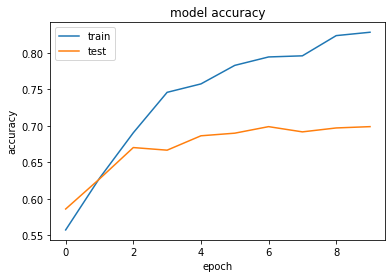

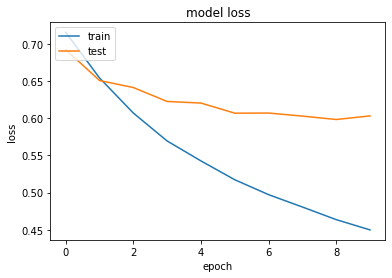

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, np.round(model.predict(X_test)))

array([[281, 100],
       [115, 301]])

In [ ]:
confusion_matrix(y_train, np.round(model.predict(X_train)))

array([[700, 193],
       [196, 768]])